<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 4 Statistical Plots in Python

Numerical statistics and plot can help to understand unkown data sets. This notebook shows, how You can use Python make a quick analysis of a data set.


## Descriptive Statistics in Python

First, we generate some key numbers, that describe each variable in the data set.

In [1]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Calculating Statistics

The `describe()` function automatically generates key charcteristics for each variable in the data frame:

In [2]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Note, that we can also apply functions to calculate single statistics based on single columns:

In [3]:
penguins["bill_length_mm"].mean()

43.9219298245614

In [4]:
penguins["flipper_length_mm"].var()

197.73179160021266

### Histogram

To improve our understanding of the distribution of one variables of the data, we can plot a histogram.

If, we just want to take a quick look at the data of the column `flipper_length_mm`, we can use the pandas function `hist()`

<AxesSubplot:>

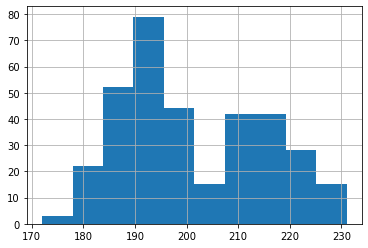

In [5]:
penguins["flipper_length_mm"].hist()

For nicer plots, seaborn, provides a ```histplot()``` that just works like any other seaborn plot. The crucial parameter of a histogram is the number of bins (`bins`).

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

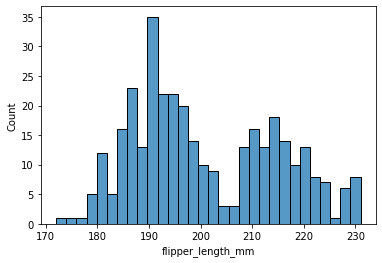

In [6]:
sns.histplot(data=penguins,  x="flipper_length_mm", bins=30)

As with other seaborn plots, we can group the data using the `hue` parameter: 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

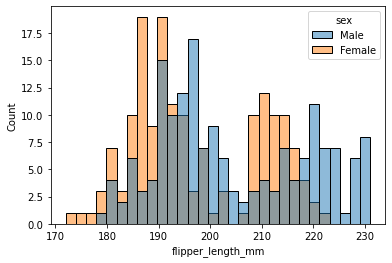

In [7]:
sns.histplot(data=penguins,  x="flipper_length_mm", bins=30, hue = "sex")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

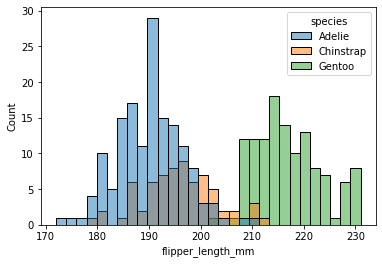

In [8]:
sns.histplot(data=penguins,  x="flipper_length_mm", bins=30, hue = "species")

#### ✍️ Task

Looking at the grouped histogram above. Which of the species do You suspect having the largest variance in `bill length`? Calculate the variance to check Your intuition.

*Hint*
- You can either `groupby()` the DataFrame by the species and calculate the variance
- Or filter the data frame for species before calculating the variance

In [10]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
penguins.groupby("species").var()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,7.093725,1.480237,42.764503,210282.891832
Chinstrap,11.150630,1.289122,50.863916,147713.454785
Gentoo,9.497845,0.962792,42.054911,254133.180061


### Box Plots for Group Differences

Box plots are even more valuable, if we want to see how a variable differs for different groups within the data.

We can call the `boxplot()` function and select the variables to show (must be numeric) and the variable to group by (should be nominal or ordinal).



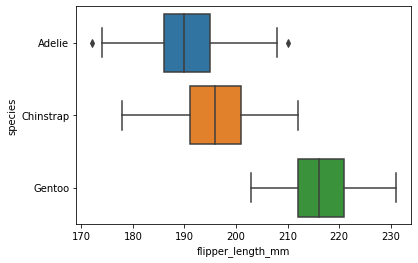

In [11]:
sns.boxplot(data=penguins, x="flipper_length_mm", y="species")

The box plots show hat the inter quartile range is pretty small for all species.
There a some outlier that are Adelie penguine.

While there seems to be no siginifcant difference between the flipper length between Adellie and Chinstrap, the flipper length of Gentoo penguine seems to be significantly longer.

The violin plot is a more modern version of the box plot. It also contains the median (white dot) and the interquartile range (black box), but also plot the distribution of the variable (smoothened  version of the histogram).

#### ✍️ Task

Make a violin plot for the bill length of the penguins grouped by species. Which species has two distinct peaks in the distribution of bill length? What could cause this?

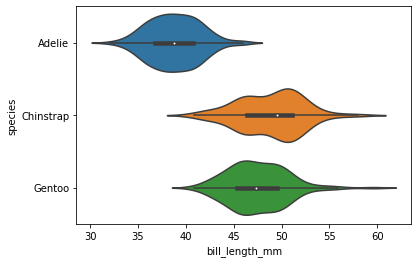

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
sns.violinplot(data=penguins, x="bill_length_mm", y="species")

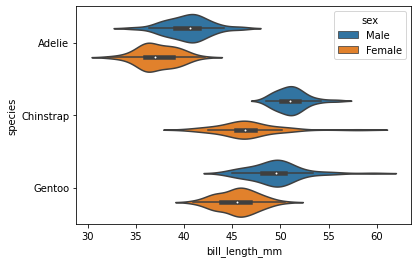

In [ ]:
# The hue parameter adds a categorical variable in the plot
# Chinstrap penguins have more pronounced sexual dimorphism
sns.violinplot(data=penguins, x="bill_length_mm", y="species", hue="sex")

### 🤓 Empirical Cumulative Density Functions

Finally, the [Empirical Cumulative Density Functions](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html) sorts the data in ascending order and puts the porportion on the y-axis. In this way You can directly read the quantile-values from the graph.

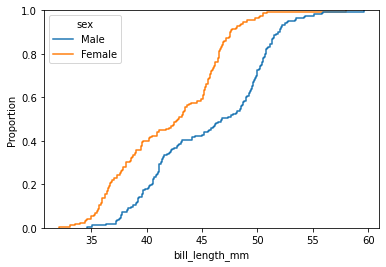

In [ ]:
sns.ecdfplot(data=penguins, x = "bill_length_mm", hue="sex")

#### ✍️ Task

How would You interpret the ECDF plot for the bill length of the penguins?

In [5]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# e.g. 80% of males have a bill length of 50mm or less

## 🏆 Challenge: Penguins 2

- use the statistical plots to answer the following questions:
- Do you find a difference in the species regarding `bill_length_mm` or `bill_depth_mm`?
- Are there any outliers in the observations of `bill_length_mm`,	`bill_depth_mm`,	`flipper_length_mm`,	`body_mass_g` in each species? 
- 🤓 Remove all outliers from the data based on the individual species (drop observations with values outside $1.5 \cdot IQR$ from the median)


In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Difference in the species regarding `bill_length_mm` or `bill_depth_mm`

  - Do you find a indication for a significant difference in the species regarding `bill_length_mm` or `bill_depth_mm`?

*Hint*:
- create two box or violin plots
-  🤓 If you want to get the numbers, You can use the `.agg(f)` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

<Axes: xlabel='bill_length_mm', ylabel='species'>

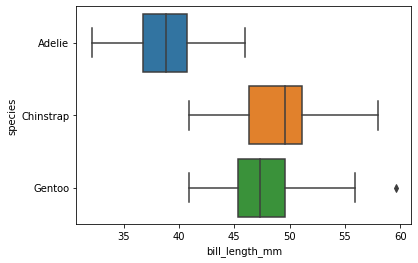

In [6]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
sns.boxplot(data=penguins, x="bill_length_mm", y = "species")

In [20]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
f = {'bill_length_mm': ['count','median', 'std']}
df1 = penguins.groupby('species').agg(f)
df1

bill_length_mm                 
                   count median       std
species                                  
Adelie               151  38.80  2.663405
Chinstrap             68  49.55  3.339256
Gentoo               123  47.30  3.081857

### Find Outliers

- Are there any outliers in the observations of `bill_length_mm`,	`bill_depth_mm`,	`flipper_length_mm`,	`body_mass_g` in each species? 

*Hint*: 
- If You use a for loop over the relevant columns remember to plot a new figure in each passing of the loop using `plt.figure()` after the `fig = sns...` line

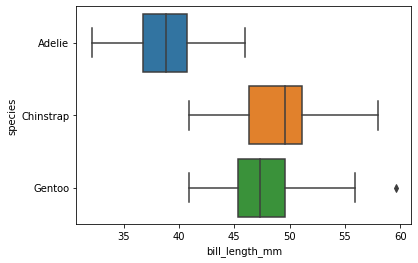

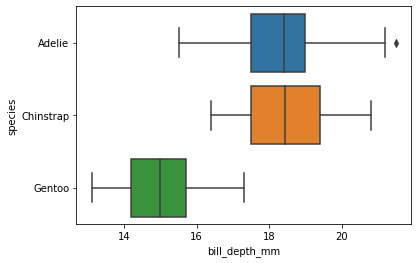

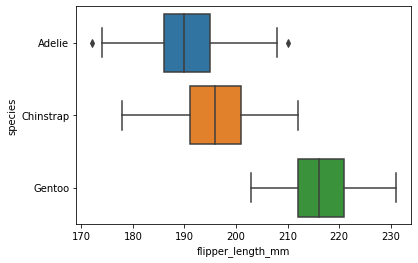

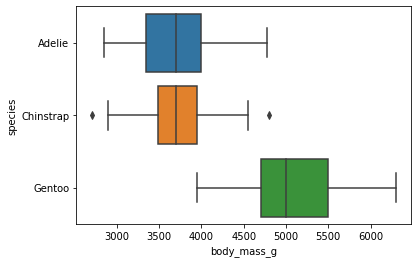

<Figure size 432x288 with 0 Axes>

In [13]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

import matplotlib
import matplotlib.pyplot as plt

for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
  fig=sns.boxplot(data = penguins, x = column, y = "species")
  plt.figure()

Given the following Boxplot for the body weight of Gentoo penguins. Is the empirical distribution of the body weight symmetrical or skewed to the [left](https://www.itl.nist.gov/div898/handbook/eda/section3/histogr7.htm) or [right](https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm)?

Validate Your answer by drawing a histogram.

*Hint:* You will have to filter the data frame for Gentoo penguins first. 

<Axes: xlabel='body_mass_g', ylabel='species'>

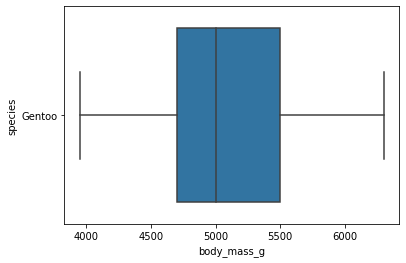

In [15]:
df_only_gentoo = penguins[penguins["species"]=="Gentoo"].copy()
sns.boxplot(data=df_only_gentoo, x="body_mass_g", y="species")

<Axes: xlabel='body_mass_g', ylabel='Count'>

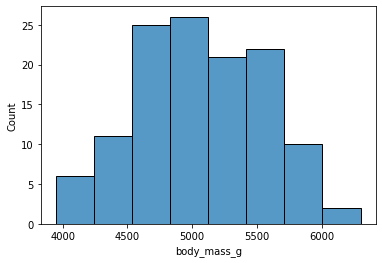

In [16]:

#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
sns.histplot(data=df_only_gentoo, x = "body_mass_g")
# The distribution is quite similar to a normal distribution / symmetric distribution

### 🤓 Remove all outliers from data

*Hint*:
- This task is more challenging
- You have to calcualte the cuttoffs for each species and each variable separately
- The cutoff (1.5* IQR) is based on the Quantiles
- If You have the cutoffs, You can use them to create a new column that stores the information whether an observation is an outlier

In [17]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
def q_25(x):
    return x.quantile(0.25)

def q_75(x):
    return x.quantile(0.75)

f = {'bill_length_mm': ['count','median', 'std', q_25, q_75]}
df1 = penguins.groupby('species').agg(f)
df1

bill_length_mm                                
                   count median       std   q_25    q_75
species                                                 
Adelie               151  38.80  2.663405  36.75  40.750
Chinstrap             68  49.55  3.339256  46.35  51.075
Gentoo               123  47.30  3.081857  45.30  49.550

In [18]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
cutoffs = {}

for species in penguins["species"].unique():
  print(species)

  penguin_species = penguins[penguins["species"]==species].copy()
  
  cutoffs[species] = {}

  for variable in ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]:
    print(variable)
    iqr = penguin_species[variable].quantile(0.75) - penguin_species[variable].quantile(0.25) 
    print(iqr)

    
    low = penguin_species[variable].quantile(0.50) - 1.5 * iqr
    high = penguin_species[variable].quantile(0.50) + 1.5 * iqr

    cutoffs[species][variable] = {"high" : high,
               "low" : low}


    #cutoffs[variable]= species_data

    #relevant_penguins = penguins[penguins["species"]==species][variable]
    #print(relevant_penguins>high)
    #print(relevant_penguins<low)
    #relevant_penguins

Adelie
bill_length_mm
4.0
bill_depth_mm
1.5
flipper_length_mm
9.0
body_mass_g
650.0
Chinstrap
bill_length_mm
4.725000000000001
bill_depth_mm
1.8999999999999986
flipper_length_mm
10.0
body_mass_g
462.5
Gentoo
bill_length_mm
4.25
bill_depth_mm
1.5
flipper_length_mm
9.0
body_mass_g
800.0


In [19]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
cutoffs


{'Adelie': {'bill_length_mm': {'high': 44.8, 'low': 32.8},
  'bill_depth_mm': {'high': 20.65, 'low': 16.15},
  'flipper_length_mm': {'high': 203.5, 'low': 176.5},
  'body_mass_g': {'high': 4675.0, 'low': 2725.0}},
 'Chinstrap': {'bill_length_mm': {'high': 56.6375, 'low': 42.46249999999999},
  'bill_depth_mm': {'high': 21.299999999999997, 'low': 15.600000000000001},
  'flipper_length_mm': {'high': 211.0, 'low': 181.0},
  'body_mass_g': {'high': 4393.75, 'low': 3006.25}},
 'Gentoo': {'bill_length_mm': {'high': 53.675, 'low': 40.925},
  'bill_depth_mm': {'high': 17.25, 'low': 12.75},
  'flipper_length_mm': {'high': 229.5, 'low': 202.5},
  'body_mass_g': {'high': 6200.0, 'low': 3800.0}}}

In [37]:
clean_data = penguins.copy()
clean_data["outlier"] = False
for species in penguins["species"].unique():

  df_in = clean_data[:]

  for variable in ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]:


    filter_is_species = df_in["species"]==species
    filter_to_high = df_in[variable] > cutoffs[species][variable]["high"]
    filter_to_low = df_in[variable] < cutoffs[species][variable]["low"]
    filter_common = ((filter_to_low | filter_to_high) & filter_is_species)
    clean_data["outlier"] = filter_common | clean_data["outlier"]

clean_data[clean_data["outlier"]==False]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,outlier
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

# 🤓 Optional Tasks

## Creating Random Numbers


Numpy allows You to create random number from different distributions. 

For instance, you can draw from countinous random uniform distribution between $0$ and $1$ using the ```random``` function.

As You see, in the following, each call will generate a new random number:

In [21]:
import numpy as np

np.random.random()

0.37808822200492553

In [22]:
np.random.random()

0.7873783378361482

### Setting a Seed

Random numbers generated by a computer are not really random. However, they behave as if they are.

In some cases, You want randomness, but also repoduce the results. For instance, when You want to change some problem in Your code and rerun the script.

Setting an RadomState with an arbitrary number let's the process on generating random numbers start from the same state, resulting in the same results anytime You run the code:

In [23]:
rng = np.random.RandomState(2021)

rng.random()

0.6059782788074047

In [24]:
rng = np.random.RandomState(2021)

rng.random()

0.6059782788074047

### Creating Multiple Random Numbers
 
As numpy is based on arrays, most random number generators let define You an array size to create multiple random numbers. Let's assume we draw a random sample from uniform data:

In [25]:
rng = np.random.RandomState(2021)
uniform_data = rng.random(size = 5)
uniform_data

array([0.60597828, 0.73336936, 0.13894716, 0.31267308, 0.99724328])

### Calculation Mean and Variance of a Sample

We can get the mean and the unbiased variance of the sample:
- mean and 
  $$\bar{x} = \frac{1}{n}\sum^n_{i=1}{x_i}$$
- the unbiased variance of the sample:    
  $$s^{2} = \frac{\displaystyle\sum_{i=1}^N (x_i-\bar x)^2}{n - 1}$$

In [26]:
# The mean
uniform_data.mean() 

0.5576422323848614

In [27]:
# The unbiased variance (with ddof = 1 - degrees of freedom)
uniform_data.var(ddof=1) 

0.11544523238409939

🤓 **Task** - This is optional, You find the solution below!

Write two functions, that calculate the 
- mean: `calc_mean()`
  $$\bar{x} = \frac{1}{n}\sum^n_{i=1}{x_i}$$
- unbiased variance of the sample `calc_var()`    
  $$s^{2} = \frac{\displaystyle\sum_{i=1}^N (x_i-\bar x)^2}{n - 1}$$


Test if the numpy function ```var()``` and ```var(ddof=0)``` return the same results.

In [36]:
def calc_mean(array):
  """Function das calculates the mean of an array"""
  sum = 0
  for x in array:
    sum = sum + x
  return sum/len(array)

print(calc_mean(uniform_data))
print(uniform_data.mean())

0.5576422323848614
0.5576422323848614


In [37]:
def calc_var(array):
  """Function that calculates the unbiased variance of an array"""
  sum = 0
  mean = calc_mean(array)
  for x in array:

    sum = sum + (x-mean)**2
  return sum/(len(array)-1)

print(calc_var(uniform_data))
print(uniform_data.var())

0.11544523238409939
0.09235618590727951


We see that the ```var()``` function does not calculate the unbiased variance of the sample, but results in a smaller number, most likely calculating the variance of the population:   

$$\sigma^{2} = \frac{\displaystyle\sum_{i=1}^N (x_i-\mu)^2}{N}$$

Is this a problem we have to care about in practice?

🤓 **Task** - This is optional, You find the solution below!

The true variance of a uniform distribution is 
$$V(X)={\frac {1}{12}}(b-a)^{2}$$

Create a DataFrame with three columns: `'Sample Size'`,`'Variance'`,`'Calculation Method'`

Draw samples with 1 up to 100 numbers and put the resulting variances in the DataFrame. 

For each sample size store: The true variance ($1/12$), the unbiased sample variance and the variance based on the formula for the whole population. 

Create a line plot so show, how the variance develops with sample size.

In [38]:
def calc_mean(array):
  sum = 0
  for x in array:
    sum = sum + x
  return sum/len(array)

print(calc_mean(uniform_data))
print(uniform_data.mean())

0.5576422323848614
0.5576422323848614


In [39]:
def calc_var(array):
  sum = 0
  mean = calc_mean(array)
  for x in array:

    sum = sum + (x-mean)**2
  return sum/(len(array)-1)

print(calc_var(uniform_data))
print(uniform_data.var())

0.11544523238409939
0.09235618590727951


In [42]:
import pandas as pd


real_var = 1/12

sample_sizes = []
variances = []
calculation_methods = []

for sample_size in range(1,100):
    sample = rng.random(size = sample_size)

    # Add real variance
    sample_sizes.append(sample_size)
    variances.append(real_var)
    calculation_methods.append('True Variance')

    # Add real variance
    sample_sizes.append(sample_size)
    variances.append(calc_var(sample))
    calculation_methods.append('Unbiased variance of the sample')

    # Add real variance
    sample_sizes.append(sample_size)
    variances.append(sample.var())
    calculation_methods.append('Variance of the population')

results_df = pd.DataFrame({'Sample Size': sample_sizes, 
             'Variance': variances,
             'Calculation Method' : calculation_methods
             })

C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_12112\2159051891.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return sum/(len(array)-1)


In the resulting Dataframe, we see the result of the experiment, that allows us to find out, how different the unbiased and the biased variance are for different sample sizes.

Hence, we have the following variables:
- Sample size: How many random numbers we have in the sample
- The calculation method for the variance
- the resulting variance value

Note, that the True Variance is allways the same, as all the samples are drawn from the same uniform distribution!

In [43]:
results_df

,Sample Size,Variance,Calculation Method
0,1,0.083333,True Variance
1,1,NaN,Unbiased variance of the sample
2,1,0.000000,Variance of the population
3,2,0.083333,True Variance
4,2,0.236270,Unbiased variance of the sample
...,...,...,...
292,98,0.095121,Unbiased variance of the sample
293,98,0.094150,Variance of the population
294,99,0.083333,True Variance
295,99,0.071135,Unbiased variance of the sample


## Task 

Make a line plot of the variance, to see how it reacts to the sample size.

*Hints*
- use `sns.lineplot(data=<>, y=<>, x=<>, hue = "Calculation Method")` 

<Axes: xlabel='Sample Size', ylabel='Variance'>

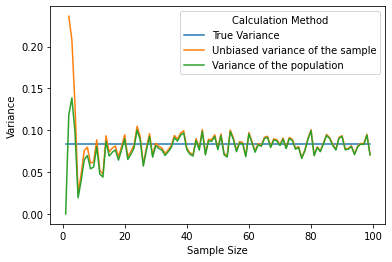

In [44]:
import seaborn as sns

sns.lineplot(data=results_df, x="Sample Size", y="Variance", hue="Calculation Method")



We observe, that the $(n-1)$ in the denominator of the unbiased variance of the sample does not make a big difference, once we reach 10 samples.
We see, that a sample size of 30 is large enough to provide reasonable estimates for the true variance.

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Plotting Random Numbers

### Histogram

To improve our understanding of the data, we can plot a histogram.

Seaborn, provides a ```histplot()``` that just works like any other plot. The crucial parameter of a histogram is the number of bins.

<AxesSubplot:xlabel='Variance', ylabel='Count'>

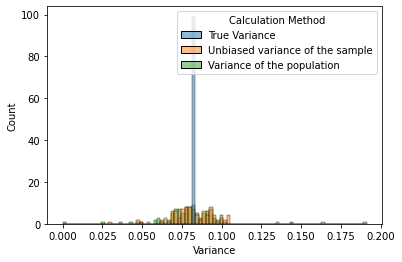

In [53]:
import seaborn as sns
sns.histplot(data=results_df, x="Variance", hue = "Calculation Method")

<Axes: xlabel='Variance', ylabel='Count'>

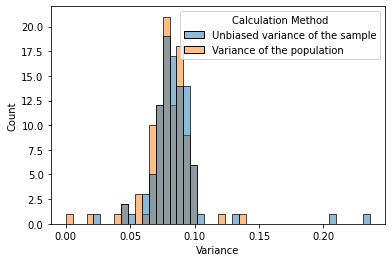

In [45]:
# We remove the True variance, where all the observations are the same (1/12)
results_df_plot = results_df[results_df["Calculation Method"]!="True Variance"]

sns.histplot(data=results_df_plot, x="Variance", hue = "Calculation Method")

Filtering out the true variance of ($1/12 = 0.8333$), we can that that variance formula for the population variance has the tenency to underestimate the true variance, which You can also see in the plot above.

✍️ **Task**

Play around with the parameters like bin size, You find in the [documentation](
https://seaborn.pydata.org/generated/seaborn.histplot.html)

<Axes: xlabel='Variance', ylabel='Count'>

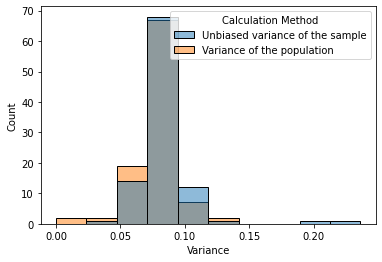

In [46]:
sns.histplot(data=results_df_plot, x="Variance", hue = "Calculation Method", bins=10)

### Box Plots

The box plots show some outliers and that the inter-quartile range is pretty small. Even when there is no real differences between the boxes (both estimators are good), here the tendency for under-estimation of the second formula (Orange) is even more obvious.

<Axes: xlabel='Calculation Method', ylabel='Variance'>

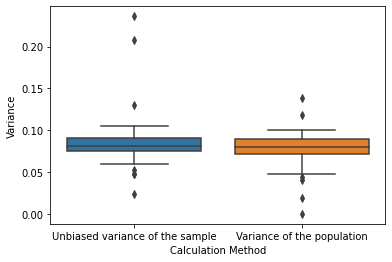

In [47]:
sns.boxplot(data=results_df_plot, x="Calculation Method", y="Variance")

### 🤓 Empirical Cumulative Density Functions

Finally, the [Empirical Cumulative Density Functions](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html) sorts the data in ascending order and puts the proportion on the y-axis. In this way You can directly read the quantile-values from the graph.

<Axes: xlabel='Variance', ylabel='Proportion'>

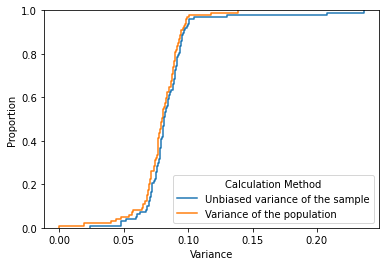

In [48]:
sns.ecdfplot(data=results_df_plot, hue="Calculation Method", x="Variance")

If you want to get the quantiles directly, you can use the pandas quantile function. Here, we get the $50\%$ quantile (median):

In [50]:
results_df_plot["Variance"].quantile(q=0.5)

0.08082295139770995

Finally, we can apply some advanced Python functions, to get the results in one table:

In [51]:
# Defines a function, that takes a series x and returns the 25% quantile
def q_25(x):
    return x.quantile(0.25)

# Defines a function, that takes a series x and returns the 25% quantile
def q_75(x):
    return x.quantile(0.75)

# A dicitionary that describes what function we want to use on the data
f = {'Variance': ['mean', 'median', 'std', q_25, q_75]}

# A group by, where we use agg, to apply all function defined in f on the column variance
df1 = results_df.groupby('Calculation Method').agg(f)
df1

Variance                                \
                                     mean    median       std      q_25   
Calculation Method                                                        
True Variance                    0.083333  0.083333  0.000000  0.083333   
Unbiased variance of the sample  0.084546  0.081567  0.024182  0.075418   
Variance of the population       0.079166  0.079444  0.017062  0.071353   

                                           
                                     q_75  
Calculation Method                         
True Variance                    0.083333  
Unbiased variance of the sample  0.091075  
Variance of the population       0.088976

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

In [ ]:
## Fitting a Distribution



In [52]:
!pip install fitter

import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\JLHUBER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
dataset = sns.load_dataset("penguins")
dataset = dataset[dataset["species"]=="Gentoo"]
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


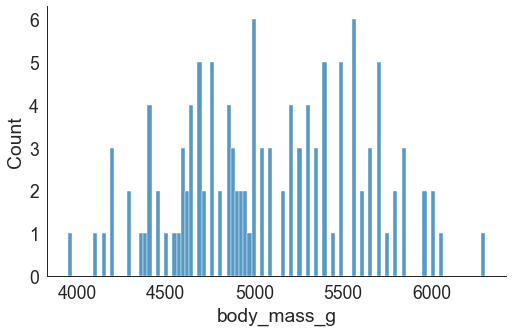

In [54]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="body_mass_g", kind="hist", bins = 100, aspect = 1.5)

In [62]:
body_mass = dataset["body_mass_g"]
body_mass.dropna(inplace=True)
body_mass

220    4500.0
221    5700.0
222    4450.0
223    5700.0
224    5400.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 123, dtype: float64

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000028,1607.355081,1618.603818,inf,0.051908,0.877430
lognorm,0.000028,1616.530621,1624.967174,inf,0.070830,0.544041
gamma,0.000028,1616.573751,1625.010304,inf,0.070340,0.552926
norm,0.000028,1615.040156,1620.664525,inf,0.069093,0.575724
uniform,0.000033,1556.434121,1562.058490,inf,0.157758,0.003856


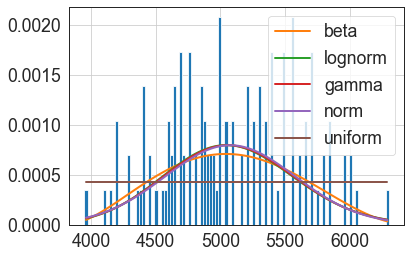

In [63]:
f = Fitter(body_mass, distributions=['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform'])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000028,1615.040156,1620.664525,inf,0.069093,0.575724


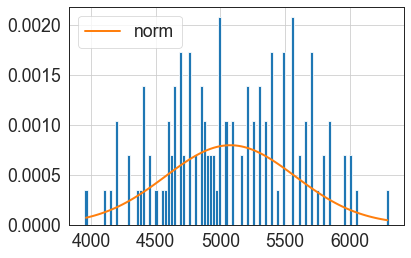

In [64]:
f = Fitter(body_mass,
           distributions=["norm"])
f.fit()
f.summary()